In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\lordtable\\anaconda3\\envs\\UTDSGC-C2-env'

In [3]:
# DS Basics
import numpy as np
import pandas as pd
import pandas_profiling as pdp
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from Dora import Dora

# SQL
from sqlalchemy import create_engine
import pymysql

# SKLearn Stuff
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# helpers
%matplotlib inline

# Data preparation & cleaning

In [110]:
#to read data on csv, use the command below
#this is the raw data from SQL and saved as csv as it is
credit=pd.read_csv('C2T1.csv')

In [111]:
# for ease of reading, interpreting & reporting, save as a html file and ready with browser
#pdp.ProfileReport(credit).to_file('credit_raw_PandasProfilingReport.html')

# if want to see the ProfileReport here on the notebook, remove the to_file method

In [112]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30204 entries, 0 to 30203
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MyUnknownColumn  30203 non-null  object
 1   X1               30204 non-null  object
 2   X2               30204 non-null  object
 3   X3               30204 non-null  object
 4   X4               30204 non-null  object
 5   X5               30204 non-null  object
 6   X6               30204 non-null  object
 7   X7               30204 non-null  object
 8   X8               30204 non-null  object
 9   X9               30204 non-null  object
 10  X10              30204 non-null  object
 11  X11              30204 non-null  object
 12  X12              30204 non-null  object
 13  X13              30204 non-null  object
 14  X14              30204 non-null  object
 15  X15              30204 non-null  object
 16  X16              30204 non-null  object
 17  X17              30204 non-null

In [113]:
credit.describe()

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30203,30204,30204,30204,30204,30204,30204,30204,30204,30204,...,30204,30204,30204,30204,30204,30204,30204,30204,30204,30204
unique,30001,83,4,6,6,58,13,13,13,13,...,21550,21012,20606,7945,7901,7520,6939,6899,6941,4
top,86,50000,female,university,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not default
freq,2,3397,18217,14107,16088,1619,14828,15830,15863,16566,...,3218,3530,4045,5287,5437,6007,6450,6744,7233,23519


In [114]:
credit.head()

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [115]:
# deal with duplicates
credit_ed=credit.drop_duplicates()

In [117]:
credit_ed.head()

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [118]:
credit_ed.to_csv ('credit_ed.csv',index=False)

In [119]:
#read saved csv data above. In Excel I've removed the header with keywords
credit_ed=pd.read_csv('credit_ed1.csv')

In [120]:
# remove first row from Dataframe: not needed
#credit_ed=credit_ed.drop(0)
credit_ed.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1.0,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2.0,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3.0,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4.0,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5.0,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [121]:
# rename MyUnknownColumn with ID
#credit_ed=credit_ed.rename(columns={'MyUnknownColumn':'ID'})
#credit_ed.head()

In [122]:
credit_ed.dtypes

ID                            float64
LIMIT_BAL                      object
SEX                            object
EDUCATION                      object
MARRIAGE                       object
AGE                            object
PAY_0                          object
PAY_2                          object
PAY_3                          object
PAY_4                          object
PAY_5                          object
PAY_6                          object
BILL_AMT1                      object
BILL_AMT2                      object
BILL_AMT3                      object
BILL_AMT4                      object
BILL_AMT5                      object
BILL_AMT6                      object
PAY_AMT1                       object
PAY_AMT2                       object
PAY_AMT3                       object
PAY_AMT4                       object
PAY_AMT5                       object
PAY_AMT6                       object
default payment next month     object
dtype: object

In [123]:
credit_ed.describe()

,ID
count,30000.000000
mean,15000.500000
std,8660.398374
min,1.000000
25%,7500.750000
50%,15000.500000
75%,22500.250000
max,30000.000000


In [137]:
# Change ID to int dtype
credit_ed["ID"]=np.int32(credit_ed['ID'])
credit_ed.dtypes

ID                             int32
LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                       int64
AGE                            int64
PAY_0                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

In [138]:
# substitute cells with an internally-consistent NaN
credit_ed=credit_ed.replace(['','null'],[np.nan,np.nan])

In [139]:
#find wich row(s) have a NaN
credit_ed[credit_ed['ID'].isnull()].index.tolist()

[]

In [141]:
# let's print samples around the row(s) above to verify
#print(credit_ed.loc[200:206,:])

In [142]:
# rows 202 is a repeat of a bad header. 
# let's remove it
#credit_ed=credit_ed.drop(credit_ed.index[201])
#print(credit_ed.loc[200:206,:])

In [143]:
credit_ed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int32 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [144]:
credit_ed.dtypes

ID                             int32
LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                       int64
AGE                            int64
PAY_0                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

In [146]:
# transform values from object to int64, as many columns as possible

#credit_ed2=credit_ed.apply(pd.to_numeric,errors='ignore')

credit_ed2=credit_ed

credit_ed2[["LIMIT_BAL","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1",
            "BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3",
           "PAY_AMT4","PAY_AMT5","PAY_AMT6"]]=credit_ed2[["LIMIT_BAL","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1",
            "BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3",
           "PAY_AMT4","PAY_AMT5","PAY_AMT6"]].apply(pd.to_numeric)

#credit_ed2=credit_ed
#credit_ed2=credit_ed.astype('int64')

In [147]:
credit_ed2.dtypes

ID                             int32
LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                       int64
AGE                            int64
PAY_0                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

In [148]:
credit_ed2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [149]:
credit_ed2.to_csv ('credit_ed2.csv',index=False)

In [150]:
# We need to convert X2 and X3 to a somewhat numeric format to be used as predictor
#X1 is amount of credit given. no need to modify now, discretize later
#X2 is the gender: 1=male, 2=female

dict_X2={'male':1,'female':2}
credit_ed3=credit_ed2.replace(dict_X2,value=None)
# X3 is Education: 1=graduate school, 2=university, 3=high school, 0,4,5,6=others
dict_X3={'graduate school':1,'university':2,'high school':3,'other':0}
credit_ed3=credit_ed2.replace(dict_X3,value=None)
# X4 is Marital status: 1=married, 2=single, 3=divorce, 0=others
#no need to do X4, already done
#X5 is age (yrs). no need to modify now, discretize later

In [151]:
credit_ed3.to_csv ('credit_ed3.csv',index=False)

In [62]:
#sns.catplot('X2', data=credit_ed3, kind='count')

In [152]:
credit_ed3.dtypes

ID                             int32
LIMIT_BAL                      int64
SEX                           object
EDUCATION                      int64
MARRIAGE                       int64
AGE                            int64
PAY_0                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

In [153]:
credit_ed3.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [227]:
credit_ed3["SEX"]=credit_ed3["SEX"].astype('category')
credit_ed3["SEX"]=credit_ed3["SEX"].cat.codes

In [228]:
credit_ed3.dtypes

ID                             int32
LIMIT_BAL                      int64
SEX                             int8
EDUCATION                      int64
MARRIAGE                       int64
AGE                            int64
PAY_0                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

In [229]:
credit_ed3.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,0,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,0,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,0,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,0,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [255]:
# execute the line below to get the equivalence to the codes, currently giving ERROR
#SEX_index = dict(enumerate(credit_ed3['SEX'].cat.categories ) )

## female was made =0, and male was made =1

In [154]:
# we deal with Y (target or dependent variable) separately, using Label encoding
#label=preprocessing.LabelEncoder()

#credit_ed4=credit_ed3

#credit_ed4['Y']=label.fit_transform(credit_ed3['Y'])
#print(credit_ed4['Y'].unique())


In [232]:
# or I can do the label encoding using a dictionary.
# It provides more control on the number assigned to the label

credit_ed4=credit_ed3

#Y is the target variable clients behavior: 0=not default, 1=default
dict_Y={'not default':0,'default':1}
credit_ed4=credit_ed4.replace(dict_Y,value=None)


In [233]:
credit_ed4.dtypes

ID                            int32
LIMIT_BAL                     int64
SEX                            int8
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [234]:
credit_ed3.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,0,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,0,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,0,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,0,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [235]:
credit_ed4.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,0,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [159]:
# for ease of reading, interpreting & reporting, save as a html file and ready with browser
#pdp.ProfileReport(credit_ed4).to_file('credit_ed4_PandasProfilingReport.html')

# if want to see the ProfileReport here on the notebook, remove the to_file method

Summarize dataset:   0%|          | 0/39 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [236]:
#save final edition to .csv, to be used for EDA & beyond
#credit_ed4.to_csv ('credit_ed4.csv',index=False)

# EDA

In [237]:
#to read the final edited data on csv
# this to keep things on one notebook and avoid running all the 
# data cleaning again
data=pd.read_csv('credit_ed4.csv')

### Need to create a dummy dataframe containing all feature keywords and descriptors that can be called anytime

In [238]:
header=data.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [239]:
dict_header={'keyword':['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
            'descriptor':['Customer ID', 'Amount of credit given', 'Gender', 'Education', 'Marital status', 'Age', 'past pmt status Sept 2005', 'past pmt status Aug 2005', 'past pmt status Jul 2005', 'past pmt status Jun 2005', 'past pmt status May 2005',
       'past pmt status Apr 2005', 'Amt stmt Sep 2005', 'Amt stmt Aug 2005', 'Amt stmt Jul 2005', 'Amt stmt Jun 2005', 'Amt stmt May 2005', 'Amt stmt Apr 2005', 'Amt paid Sep 2005', 'Amt paid Aug 2005', 'Amt paid Jul 2005',
       'Amt paid Jun 2005', 'Amt paid May 2005', 'Amt paid Apr 2005', 'Default status']}


# create auxiliary dataframe to store & visualize the long variable names
myheader=pd.DataFrame(dict_header)



In [256]:
#myheader

In [241]:
myheader['Alias']=['ID','X1','X2','X3','X4','X5',
                     'X6','X7','X8','X9','x10','X11','X12',
                     'X13','X14','X15','X16','X17',
                     'X18','X19','X20','X21','X22','X23',
                     'y']

# these aliases are the ones originally contained as another
# header of the dataset, and also included on the data summary pdf

In [242]:
myheader

,keyword,descriptor,Alias
0,ID,Customer ID,ID
1,LIMIT_BAL,Amount of credit given,X1
2,SEX,Gender,X2
3,EDUCATION,Education,X3
4,MARRIAGE,Marital status,X4
5,AGE,Age,X5
6,PAY_0,past pmt status Sept 2005,X6
7,PAY_2,past pmt status Aug 2005,X7
8,PAY_3,past pmt status Jul 2005,X8
9,PAY_4,past pmt status Jun 2005,X9


### I can call *myheader* anytime to remind me of variables keywords
### and aliases

#### Let's plot some histograms

In [243]:
# number of bins, common for all the variables histograms
nbins=4

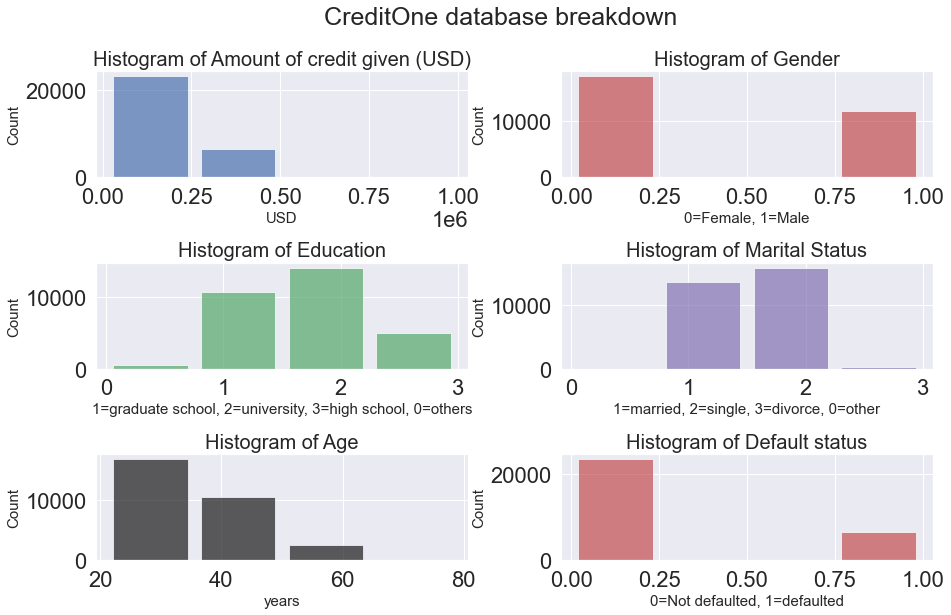

In [248]:
fig,axs=plt.subplots(3,2, figsize=(15,9))
fig.subplots_adjust(hspace=0.8,wspace=0.25)

axs[0,0].hist(data['LIMIT_BAL'], bins=nbins, color='b', alpha=0.7, rwidth=0.85)
axs[0,0].set_title('Histogram of Amount of credit given (USD)',fontsize=20)
axs[0,0].set_xlabel('USD',fontsize=15)
axs[0,0].set_ylabel('Count',fontsize=15)


#
axs[0,1].hist(data['SEX'], bins=nbins, color='r', alpha=0.7, rwidth=0.85)
axs[0,1].set_title('Histogram of Gender',fontsize=20)
axs[0,1].set_xlabel('0=Female, 1=Male',fontsize=15)
axs[0,1].set_ylabel('Count',fontsize=15)

#
axs[1,0].hist(data['EDUCATION'], bins=nbins, color='g', alpha=0.7, rwidth=0.85)
axs[1,0].set_title('Histogram of Education',fontsize=20)
axs[1,0].set_xlabel('1=graduate school, 2=university, 3=high school, 0=others',fontsize=15)
axs[1,0].set_ylabel('Count',fontsize=15)

#
axs[1,1].hist(data['MARRIAGE'], bins=nbins, color='m', alpha=0.7, rwidth=0.85)
axs[1,1].set_title('Histogram of Marital Status',fontsize=20)
axs[1,1].set_xlabel('1=married, 2=single, 3=divorce, 0=other',fontsize=15)
axs[1,1].set_ylabel('Count',fontsize=15)

#
axs[2,0].hist(data['AGE'], bins=nbins, color='k', alpha=0.7, rwidth=0.85)
axs[2,0].set_title('Histogram of Age',fontsize=20)
axs[2,0].set_xlabel('years',fontsize=15)
axs[2,0].set_ylabel('Count',fontsize=15)

#
axs[2,1].hist(data['default payment next month'], bins=nbins, color='r', alpha=0.7, rwidth=0.85)
axs[2,1].set_title('Histogram of Default status',fontsize=20)
axs[2,1].set_xlabel('0=Not defaulted, 1=defaulted',fontsize=15)
axs[2,1].set_ylabel('Count',fontsize=15)


#
fig.suptitle('CreditOne database breakdown', fontsize=25)
fig.savefig('C2T2_figures_X1-X5.png')

### Based on the Profile Report of the cleaned data, using the correlation matrix we can pre-screen collinearity between some variables or groups of variables:

In [249]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,0,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [250]:
# let's use aliases for ease of naming

# build dataframe subsets for ease of use sns.pairplot
# let's investigate the PAY_? variables collinearities, anchor on X6=PAY_0
df_X6_X11=data[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","default payment next month"]]
#df_X6_X11.head()




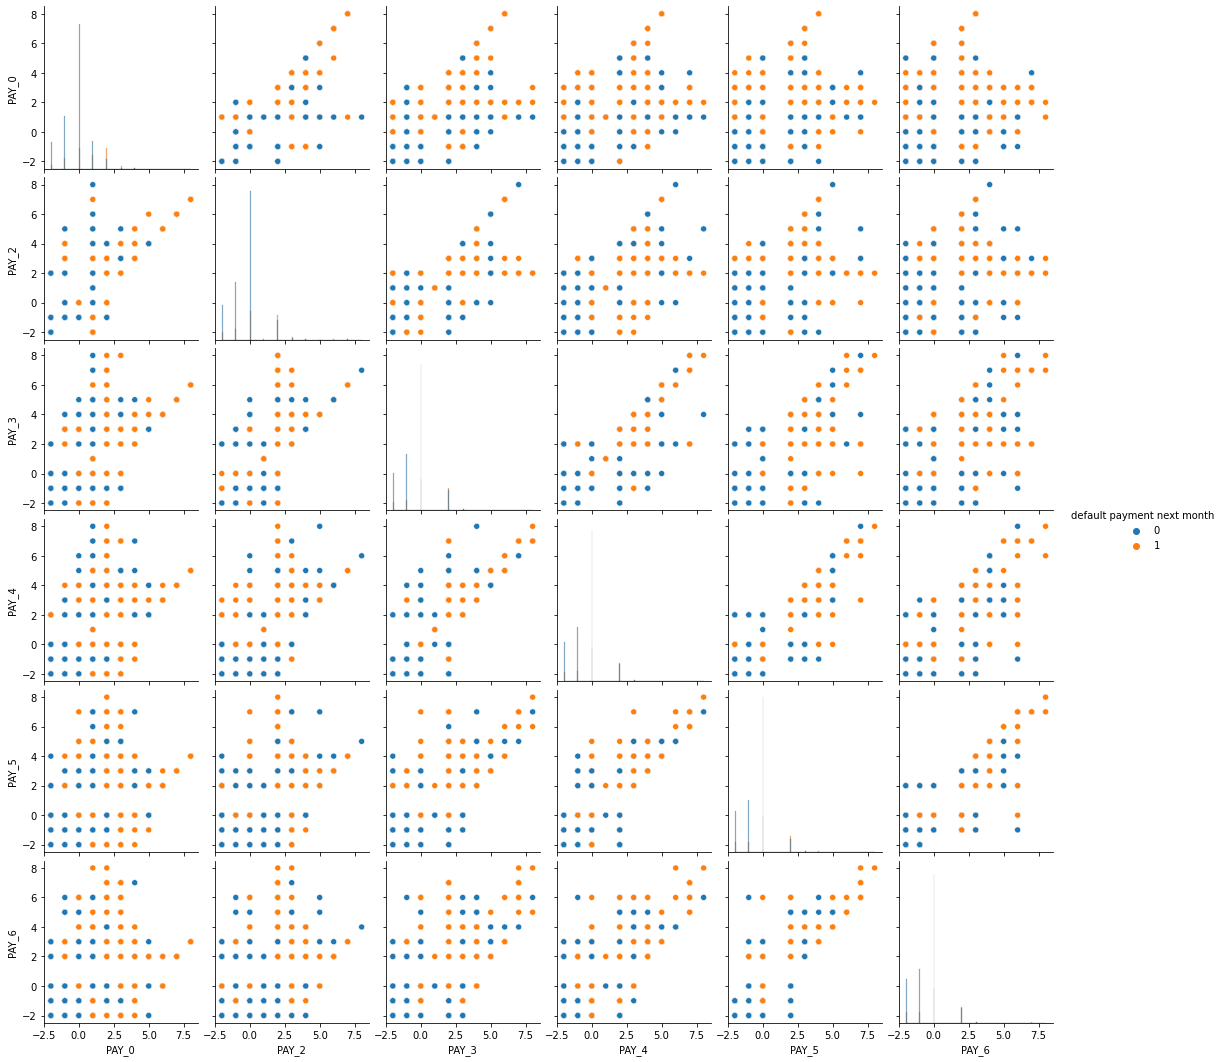

In [179]:
#g=sns.pairplot(df_X6_X11, hue="default payment next month", diag_kind="hist")
#g.savefig('C2T2_figures_X6-X11.png')

In [180]:
# build dataframe subsets for ease of use sns.pairplot
# let's investigate the BILL_AMT_? variables collinearities, anchor on X6=PAY_0
df_X12_X17=data[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","default payment next month"]]
#df_X12_X17.head()


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default payment next month
0,3913,3102,689,0,0,0,1
1,2682,1725,2682,3272,3455,3261,1
2,29239,14027,13559,14331,14948,15549,0
3,46990,48233,49291,28314,28959,29547,0
4,8617,5670,35835,20940,19146,19131,0


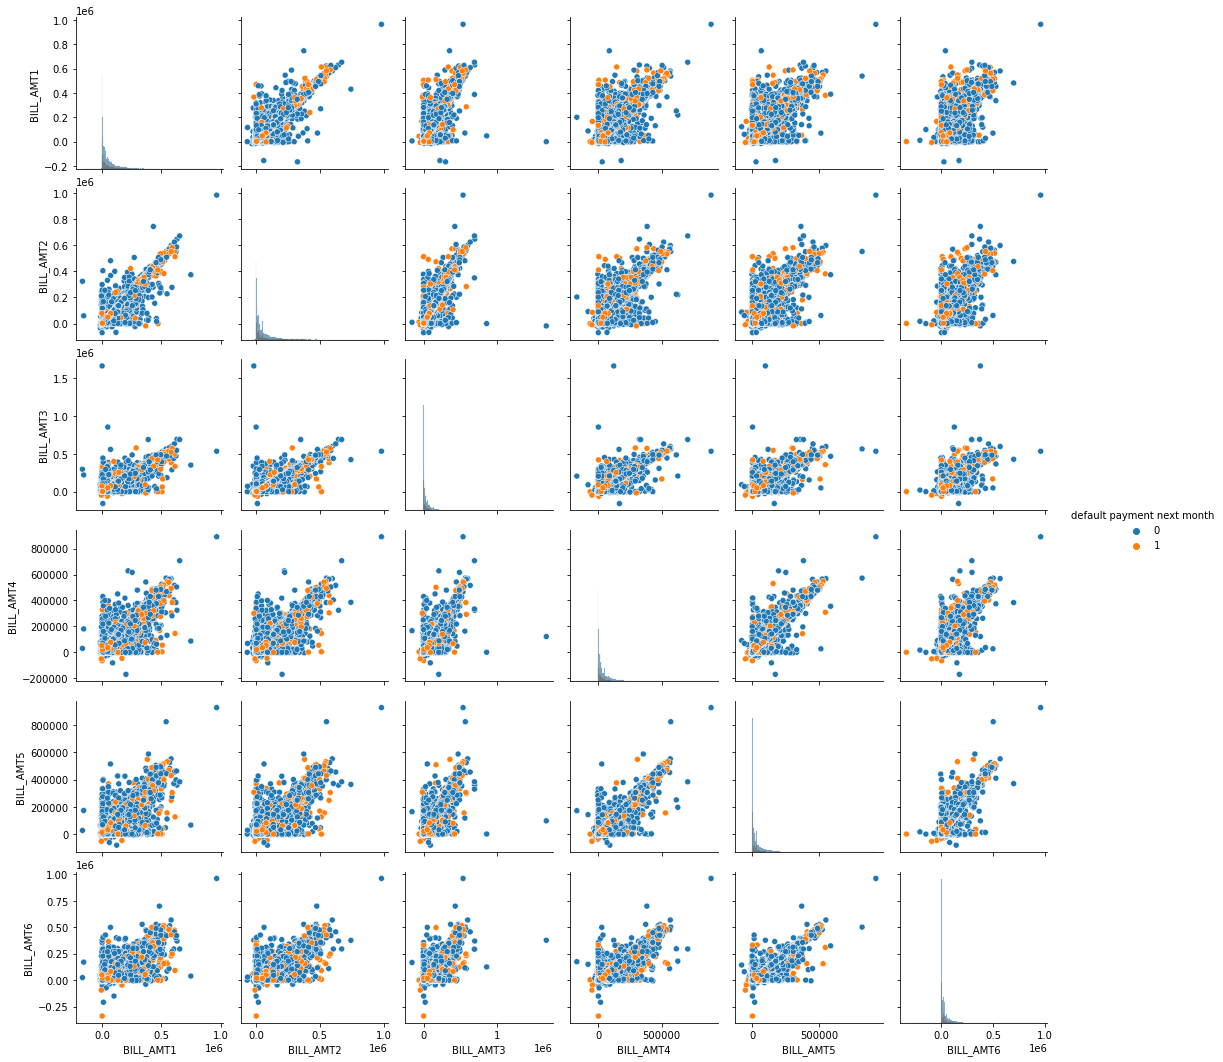

In [181]:
#g=sns.pairplot(df_X12_X17, hue="default payment next month", diag_kind="hist")
#g.savefig('C2T2_figures_X12-X17.png')

In [182]:
# build dataframe subsets for ease of use sns.pairplot
# let's investigate the PAY_AMT? variables collinearities, anchor on X6=PAY_0
df_X18_X23=data[["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","default payment next month"]]
#df_X18_X23.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,689,0,0,0,0,1
1,0,1000,1000,1000,0,2000,1
2,1518,1500,1000,1000,1000,5000,0
3,2000,2019,1200,1100,1069,1000,0
4,2000,36681,10000,9000,689,679,0


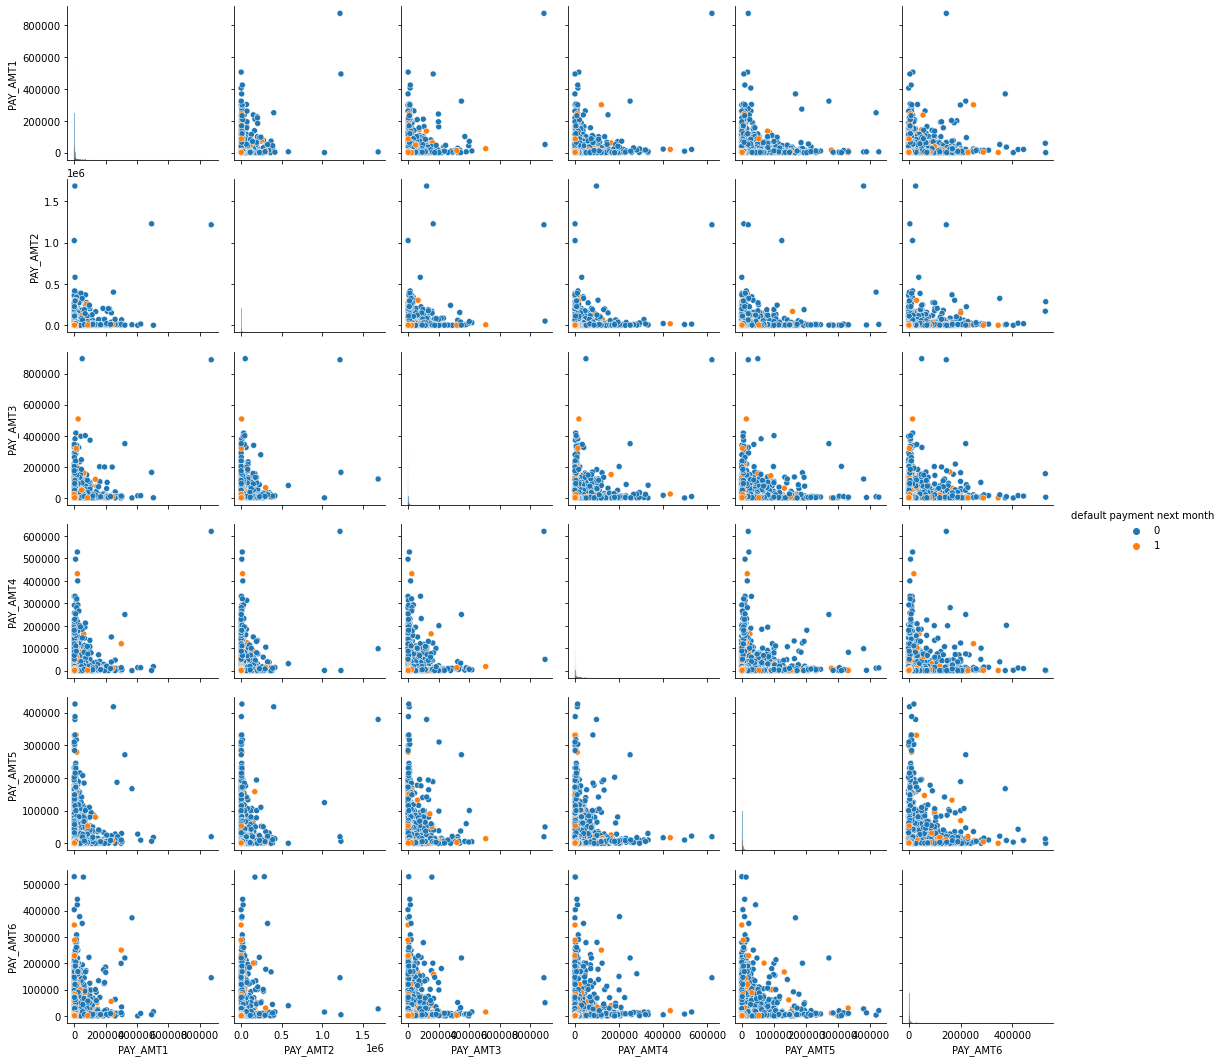

In [183]:
#g=sns.pairplot(df_X18_X23, hue="default payment next month", diag_kind="hist")
#g.savefig('C2T2_figures_X18-X23.png')

In [251]:
# correlation matrix
corrMat=data.corr()
#print(corrMat)


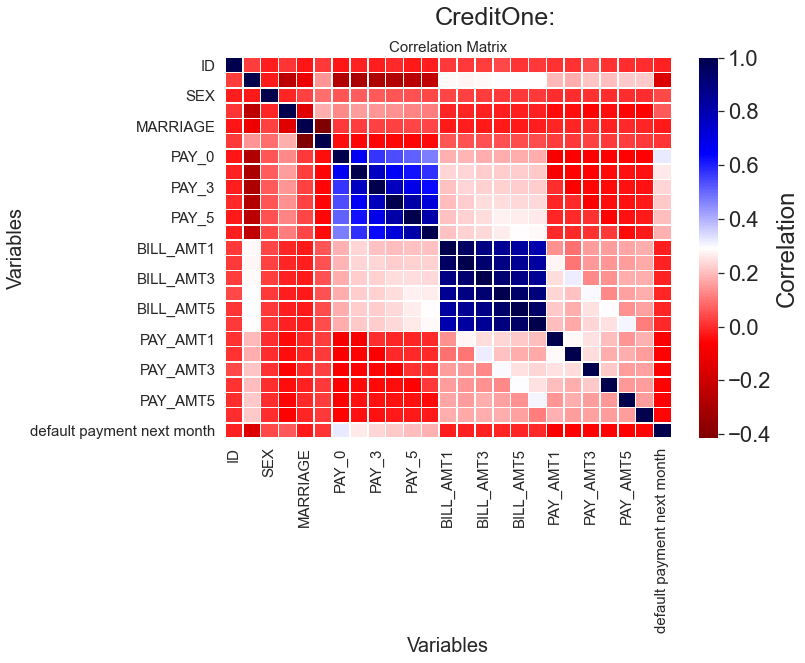

In [252]:
fig, ax = plt.subplots(figsize=(10, 7))
fig.subplots_adjust(hspace=0.45,wspace=0.45)

sns.set(font_scale=2) # for label size

fig=sns.heatmap(corrMat, annot=False, annot_kws={"size": 16},cmap="seismic_r",linewidths=.5,cbar_kws={'label': 'Correlation'}) # font size

ax.set_xlabel('Variables',fontsize=20)
ax.set_ylabel('Variables',fontsize=20)
plt.suptitle('CreditOne:',fontsize=25)
plt.title('Correlation Matrix',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.show()



In [253]:
# covariance matrix
covMat=data.cov()
#print(corrMat)

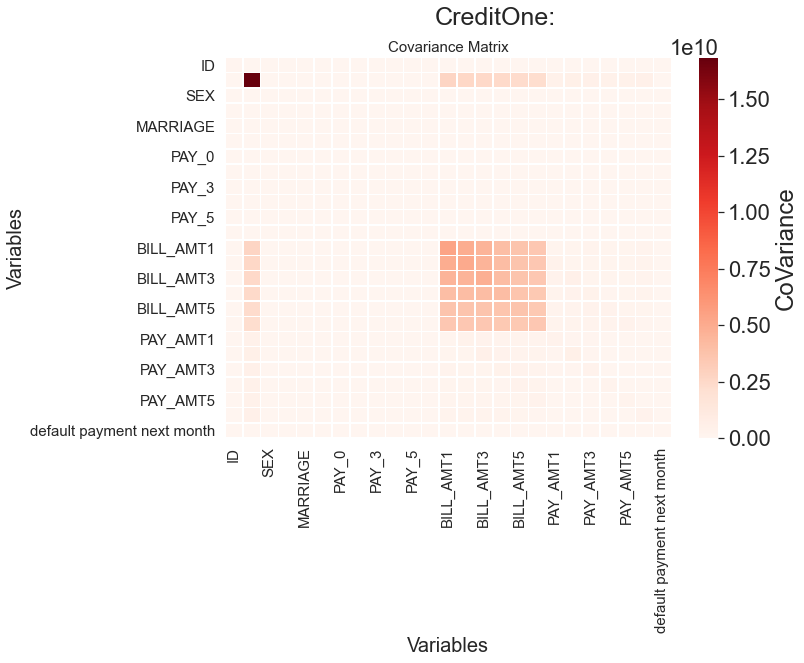

In [254]:
fig, ax = plt.subplots(figsize=(10, 7))
fig.subplots_adjust(hspace=0.45,wspace=0.45)

sns.set(font_scale=2) # for label size

fig=sns.heatmap(covMat, annot=False, annot_kws={"size": 16},cmap="Reds",linewidths=.5,cbar_kws={'label': 'CoVariance'}) # font size

ax.set_xlabel('Variables',fontsize=20)
ax.set_ylabel('Variables',fontsize=20)
plt.suptitle('CreditOne:',fontsize=25)
plt.title('Covariance Matrix',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.show()

#### The collinearities shown on most of the plots above indicates that some data reduction scheme (PCA) might be needed.REMEMBER TO UNCOMMENT THE sns.pairplot LINES IF WANTED TO SEE PLOTS IN THE NOTEBOOK!

#### Now let's see how the dependent variable plots against some features of the subsets above

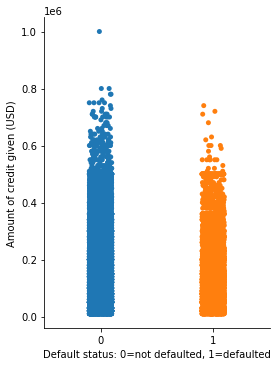

In [186]:
fg = sns.catplot(x='default payment next month',y='LIMIT_BAL', data=data, aspect=0.75)
fg.set_xlabels('Default status: 0=not defaulted, 1=defaulted',fontsize=10)
fg.set_ylabels('Amount of credit given (USD)',fontsize=10)
fg.savefig('C2T2_figures_Y_X1.png')